## Differential flux variability analysis

In [1]:
%matplotlib inline

In [66]:
from IPython.html.widgets import interact, interactive, fixed
from IPython.html import widgets
from IPython.display import clear_output, display, HTML

In [27]:
from matplotlib import pyplot
import escher
escher.urls.map_download = 'https://dl.dropboxusercontent.com/u/22461024/escher_maps/'
from pandas import merge

In [3]:
from cameo import load_model
from cameo.flux_analysis.analysis import flux_variability_analysis, phenotypic_phase_plane
from cameo.strain_design.deterministic import DifferentialFVA
from cameo.parallel import SequentialView

In [4]:
try:
    from IPython.parallel import Client
    client = Client()
    view = client.direct_view()
    view.block = True
except:
    from cameo.parallel import SequentialView
    view = SequentialView()

### E. coli core model and succinate production

Load the E. coli core model.

In [6]:
model = load_model('../tests/data/EcoliCore.xml')

The production envelope looks like this.

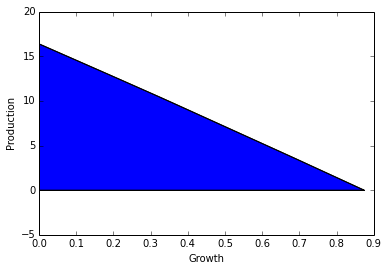

In [7]:
production_envelope = phenotypic_phase_plane(model, [model.reactions.Biomass_Ecoli_core_N_LPAREN_w_FSLASH_GAM_RPAREN__Nmet2], model.reactions.EX_succ_LPAREN_e_RPAREN_)
growth = production_envelope.Biomass_Ecoli_core_N_LPAREN_w_FSLASH_GAM_RPAREN__Nmet2
lb = production_envelope.objective_lower_bound
ub = production_envelope.objective_upper_bound
fig = pyplot.figure()
pyplot.plot(growth, lb, 'k', growth, ub, 'k')
pyplot.fill_between(growth, ub)
pyplot.xlabel('Growth')
pyplot.ylabel('Production');

Set up a model that represents a reference state (in this case a model with a constrained growth rate).

In [8]:
reference_model = model.copy()
biomass_rxn = reference_model.reactions.Biomass_Ecoli_core_N_LPAREN_w_FSLASH_GAM_RPAREN__Nmet2
biomass_rxn.lower_bound = 0.3
target = reference_model.reactions.EX_succ_LPAREN_e_RPAREN_
target.lower_bound = 2

Set up the differential flux variability analysis strain design method.

In [9]:
diffFVA = DifferentialFVA(design_space_model=model,
                          reference_model=reference_model,
                          objective=reference_model.reactions.EX_succ_LPAREN_e_RPAREN_,
                          variables=[biomass_rxn],
                          normalize_ranges_by=biomass_rxn,
                          points=10)

Run differential flux variability analysis

Scanning grid points,,,ETA: --:--:--


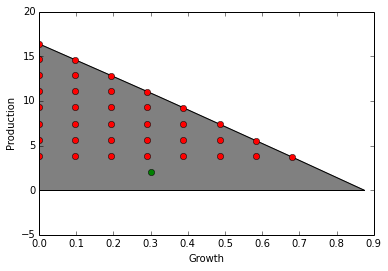

In [13]:
result = diffFVA.run(view=view)
x = [elem[0][1] for elem in list(result.items)]
y = [elem[1][1] for elem in list(result.items)]
pyplot.plot(growth, lb, 'k', growth, ub, 'k')
pyplot.plot([biomass_rxn.lower_bound], [target.lower_bound], 'go')
pyplot.fill_between(growth, ub, color='gray')
pyplot.xlabel('Growth')
pyplot.ylabel('Production');
pyplot.plot(x,y, 'ro');

In [17]:
type(result)

pandas.core.panel.Panel

Scan the optimal surface only

Scanning grid points,,,ETA: --:--:--


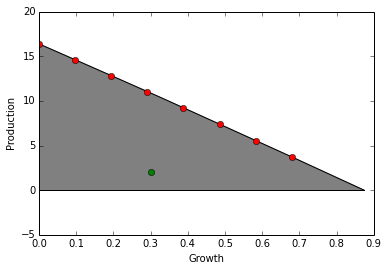

In [27]:
result = diffFVA.run(surface_only=True,view=view)

x = [elem[0][1] for elem in list(result.items)]
y = [elem[1][1] for elem in list(result.items)]
pyplot.plot(growth, lb, 'k', growth, ub, 'k')
pyplot.plot([biomass_rxn.lower_bound], [target.lower_bound], 'go')
pyplot.fill_between(growth, ub, color='gray')
pyplot.xlabel('Growth')
pyplot.ylabel('Production');
pyplot.plot(x,y, 'ro');

In [30]:
df = result[result.items[5]]

In [41]:
df.join(diffFVA.reference_flux_ranges, rsuffix='_ref', lsuffix='').query('suddenly_essential == True').sort('normalized_gaps', ascending=False)

,lower_bound,upper_bound,gaps,normalized_gaps,KO,flux_reversal,suddenly_essential,lower_bound_ref,upper_bound_ref
TPI,8.480974,8.480974,0,7.766516,False,False,True,-3.738860e+00,9.701590
FBA,8.480974,8.480974,0,7.766516,False,False,True,-3.738860e+00,9.701590
PGI,6.792208,6.792208,0,4.051286,False,False,True,-3.038285e+01,9.938500
AKGDH,2.108113,2.108113,0,0,False,False,True,0.000000e+00,13.440450
AKGt2r,0,0,0,0,False,False,True,-6.720225e+00,0.000000
ALCD2x,0,0,0,0,False,False,True,-1.189673e+01,0.000000
ATPS4r,26.2522,26.2522,0,0,False,False,True,-2.269960e+00,97.935898
CO2t,-9.778027,-9.778027,0,0,False,False,True,-3.923335e+01,4.441658
D_LACt2,0,0,0,0,False,False,True,-1.152496e+01,0.000000
ETOHt2r,0,0,0,0,False,False,True,-1.189673e+01,0.000000


In [31]:
df.join(diffFVA.reference_flux_ranges, rsuffix='_ref', lsuffix='').query('normalized_gaps > 0.1 | normalized_gaps < -0.1').sort('normalized_gaps')

,lower_bound,upper_bound,gaps,normalized_gaps,KO,flux_reversal,suddenly_essential,lower_bound_ref,upper_bound_ref
Biomass_Ecoli_core_N_LPAREN_w_FSLASH_GAM_RPAREN__Nmet2,0.4855119,0.4855119,0,0.2304745,False,False,False,0.300000,0.769526
PIt2r,1.786053,1.786053,0,0.8478464,False,False,False,1.103610,2.830854
PGI,6.792208,6.792208,0,4.051286,False,False,True,-30.382850,9.938500
EX_succ_LPAREN_e_RPAREN_,7.390192,7.390192,0,4.341868,False,False,False,2.000000,10.879575
FBA,8.480974,8.480974,0,7.766516,False,False,True,-3.738860,9.701590
TPI,8.480974,8.480974,0,7.766516,False,False,True,-3.738860,9.701590
ATPM,8.39,8.39,0,8.890728,False,False,False,8.390000,8.390000
GLCpts,10,10,0,10.59682,False,False,False,4.877796,10.000000
ENO,16.94695,16.94695,0,16.15161,False,False,False,5.313260,18.753710
PGM,-16.94695,-16.94695,0,16.15161,False,False,False,-18.753710,-5.313260


In [13]:
stuff = result[result.items[1]]
selection = stuff[abs(stuff.normalized_gaps) > .1].sort('normalized_gaps', ascending=False)
Builder('iJO1366_central_metabolism', reaction_data=selection.normalized_gaps.to_dict()).display_in_notebook()

Per default, only solution that improve upon the reference production will be scanned. Set `improvements_only=False` if you want to scan the whole envelope.

Scanning grid points,,,ETA: --:--:--


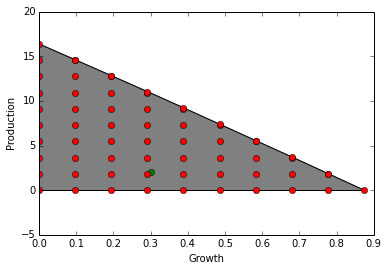

In [14]:
result = diffFVA.run(improvements_only=False, view=view)
x = [elem[0][1] for elem in list(result.items)]
y = [elem[1][1] for elem in list(result.items)]
pyplot.plot(growth, lb, 'k', growth, ub, 'k')
pyplot.plot([biomass_rxn.lower_bound], [target.lower_bound], 'go')
pyplot.fill_between(growth, ub, color='gray')
pyplot.xlabel('Growth')
pyplot.ylabel('Production')
pyplot.plot(x,y, 'ro');

In [5]:
model = load_model('../tests/data/iJO1366.xml')

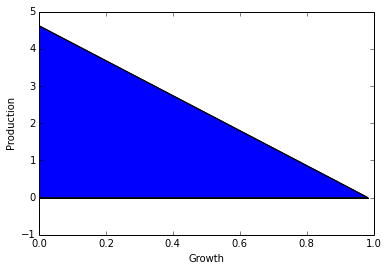

In [6]:
production_envelope = phenotypic_phase_plane(model, [model.reactions.Ec_biomass_iJO1366_core_53p95M], model.reactions.EX_trp_DASH_L_LPAREN_e_RPAREN_)
growth = production_envelope.Ec_biomass_iJO1366_core_53p95M
lb = production_envelope.objective_lower_bound
ub = production_envelope.objective_upper_bound
fig = pyplot.figure()
pyplot.plot(growth, lb, 'k', growth, ub, 'k')
pyplot.fill_between(growth, ub)
pyplot.xlabel('Growth')
pyplot.ylabel('Production');

In [7]:
reference_model = model.copy()
biomass_rxn = reference_model.reactions.Ec_biomass_iJO1366_core_53p95M
biomass_rxn.lower_bound = 0.3
target = reference_model.reactions.EX_trp_DASH_L_LPAREN_e_RPAREN_
target.lower_bound = 2

In [13]:
diffFVA = DifferentialFVA(design_space_model=model,
                          reference_model=reference_model,
                          objective=target,
                          variables=[biomass_rxn],
                          normalize_ranges_by=biomass_rxn,
                          points=10)

In [14]:
result = diffFVA.run(surface_only=True,view=view)

Scanning grid points,,,ETA: --:--:--


In [20]:
result.items[-2]

(('Ec_biomass_iJO1366_core_53p95M', 0.43660969454532839),
 ('EX_trp_DASH_L_LPAREN_e_RPAREN_', 2.5696909726348878))

In [22]:
df = result[result.items[-2]]
df.join(diffFVA.reference_flux_ranges, rsuffix='_ref', lsuffix='').query('normalized_gaps > 0.1 | normalized_gaps < -0.1').sort('normalized_gaps', ascending=False)

,lower_bound,upper_bound,gaps,normalized_gaps,KO,flux_reversal,suddenly_essential,lower_bound_ref,upper_bound_ref
PGK,-12.85749,-12.85749,0,14.17059,False,False,True,-15.277896,10.829761
GAPD,12.85749,12.85749,0,14.17059,False,False,True,-10.829761,15.277897
TPI,6.036338,6.036338,0,6.129026,False,False,True,-18.411203,7.696454
CO2tpp,-13.81128,-13.81128,0,5.947519,False,False,True,-25.685484,26.390262
CO2tex,-13.81128,-13.81128,0,5.947519,False,False,True,-25.685484,2.379199
CYTBO3_4pp,23.18579,23.18579,0,5.014842,False,False,True,0.000000,48.089320
TRPt2rpp,-2.569691,-2.569691,0,2.673688,False,False,False,-3.211869,-2.000000
TRPtex,-2.569691,-2.569691,0,2.673688,False,False,False,-3.211869,-2.000000
EX_trp_DASH_L_LPAREN_e_RPAREN_,2.569691,2.569691,0,2.673688,False,False,False,2.000000,3.211869
SHK3Dr,2.736091,2.736091,0,2.646553,False,False,False,2.114336,3.620123


In [23]:
df.join(diffFVA.reference_flux_ranges, rsuffix='_ref', lsuffix='').query('KO == True').sort('normalized_gaps', ascending=False)

,lower_bound,upper_bound,gaps,normalized_gaps,KO,flux_reversal,suddenly_essential,lower_bound_ref,upper_bound_ref
PGMT,0,0,0,0,True,False,True,-6.256627e+01,9.407754e-14
G3PCabcpp,0,0,-6.752759e-30,-6.752759e-30,True,False,False,-6.752759e-30,-6.752759e-30
FESD2s,0,0,-9.479993e-27,-9.479993e-27,True,False,False,-9.479993e-27,-9.479993e-27


In [ ]:
df.join(diffFVA.reference_flux_ranges, rsuffix='_ref', lsuffix='').query('KO == True').sort('normalized_gaps', ascending=False)

In [29]:
stuff = result[result.items[1]]
selection = stuff[abs(stuff.normalized_gaps) > .1].sort('normalized_gaps', ascending=False)
# Builder('iJO1366_central_metabolism', reaction_data=selection.normalized_gaps.to_dict()).display_in_notebook()
escher.Builder('iAF1260_Amino_Acid_Metabolism', reaction_data=selection.normalized_gaps.to_dict()).display_in_notebook()

/Users/niko/Arbejder/Dev/escher/escher/plots.py:244 UserWarning: Map "iAF1260_Amino_Acid_Metabolism" not in cache. Attempting download from https://zakandrewking.github.io/escher/


In [91]:
import pandas

In [108]:
?rxn_names_df.join

In [109]:
rxn_names_df.join(result[result.items[1]], how='inner')

,reaction_name,lower_bound,upper_bound,gaps,normalized_gaps,KO,flux_reversal,suddenly_essential
12DGR120tipp,"1,2 diacylglycerol transport via flipping (per...",-8.337867e-12,-8.337867e-12,-8.337867e-12,-7.638738e-11,False,False,True
12DGR140tipp,"1,2 diacylglycerol transport via flipping (per...",-3.753919e-12,-3.753919e-12,-3.753919e-12,-3.439153e-11,False,False,True
12DGR141tipp,"1,2 diacylglycerol transport via flipping (per...",-8.337867e-12,-8.337867e-12,-8.337867e-12,-7.638738e-11,False,False,True
12DGR160tipp,"1,2 diacylglycerol transport via flipping (per...",-8.337864e-12,-8.337864e-12,-8.337864e-12,-7.638735e-11,False,False,True
12DGR161tipp,"1,2 diacylglycerol transport via flipping (per...",-6.037607e-12,-6.037607e-12,-6.037607e-12,-5.531354e-11,False,False,True
12DGR180tipp,"1,2 diacylglycerol transport via flipping (per...",-6.037604e-12,-6.037604e-12,-6.037604e-12,-5.531351e-11,False,False,True
12DGR181tipp,"1,2 diacylglycerol transport via flipping (per...",-6.018656e-12,-6.018656e-12,-6.018656e-12,-5.513992e-11,False,False,True
12PPDRtex,"(R)-Propane-1,2-diol transport via diffusion (...",-5.131675e-13,0,0,0,False,False,True
12PPDRtpp,"(R)-Propane-1,2-diol facilitated transport (pe...",-5.131675e-13,0,0,0,False,False,True
12PPDStex,"(S)-Propane-1,2-diol transport via diffusion (...",0,0,0,0,False,False,True


In [96]:
rxn_names_df = pandas.DataFrame({'reaction_name': [r.name for r in model.reactions]}, index=(r.id for r in model.reactions))

In [2]:
def slideview(panel, reference_flux_ranges):
    def _(i=i):
        s = '<h3>Arguments:</h3><table>\n'
        for k,v in panel.items[i]:
            s += '<tr><td>{0}</td><td>{1}</td></tr>\n'.format(k,v)
        s += '</table>'
        display(HTML(s))
        df = panel[panel.items[i]].join(reference_flux_ranges, rsuffix='_ref', lsuffix='').query('normalized_gaps > 0.1 | normalized_gaps < -0.1').sort('normalized_gaps', ascending=False)
        df = rxn_names_df.join(df, how='inner')
        display(df)
    return _

In [3]:
func = slideview(result, diffFVA.reference_flux_ranges)
interact(func, i=widgets.IntSliderWidget(min=0, max=len(result)-1))

NameError: name 'result' is not defined

In [47]:
widgets.IntSliderWidget(min=0, max=10)

In [49]:
interact(func, i=widgets.IntSliderWidget(min=0, max=10))

TypeError: <functools.partial object at 0x1183e3a48> is not a Python function

In [48]:
func(1)

,lower_bound,upper_bound,gaps,normalized_gaps,KO,flux_reversal,suddenly_essential,lower_bound_ref,upper_bound_ref
PGK,-12.85749,-12.85749,0,14.17059,False,False,True,-15.277896,10.829761
GAPD,12.85749,12.85749,0,14.17059,False,False,True,-10.829761,15.277897
TPI,6.036338,6.036338,0,6.129026,False,False,True,-18.411203,7.696454
CO2tpp,-13.81128,-13.81128,0,5.947519,False,False,True,-25.685484,26.390262
CO2tex,-13.81128,-13.81128,0,5.947519,False,False,True,-25.685484,2.379199
CYTBO3_4pp,23.18579,23.18579,0,5.014842,False,False,True,0.000000,48.089320
TRPt2rpp,-2.569691,-2.569691,0,2.673688,False,False,False,-3.211869,-2.000000
TRPtex,-2.569691,-2.569691,0,2.673688,False,False,False,-3.211869,-2.000000
EX_trp_DASH_L_LPAREN_e_RPAREN_,2.569691,2.569691,0,2.673688,False,False,False,2.000000,3.211869
SHK3Dr,2.736091,2.736091,0,2.646553,False,False,False,2.114336,3.620123
